In [34]:
import pandas as Ht_De_Ptn_Pd
Ht_De_Ptn_Pre = Ht_De_Ptn_Pd.read_csv("pre_proc_heart_disease.csv")
Ht_De_Ptn_Pre.shape

(302, 14)

In [36]:
import warnings as Ht_De_Ptn_Pre_wrngs
Ht_De_Ptn_Pre_wrngs.filterwarnings("ignore")

In [37]:
# Splitting dataset @ Training - 60%, Validation - 20% and Testing - 20%

In [38]:
Ht_De_Ptn_Pre_X = Ht_De_Ptn_Pre.drop('target',axis=1)
Ht_De_Ptn_Pre_Y = Ht_De_Ptn_Pre['target']

In [39]:
from sklearn.model_selection import train_test_split as Ht_De_Ptn_Splt
Ht_De_Ptn_Xtr, Ht_De_Ptn_Xts, Ht_De_Ptn_Ytr, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Pre_X, Ht_De_Ptn_Pre_Y, test_size=0.40, random_state= 42)
print("Heart Disease Data Count - Training:", Ht_De_Ptn_Xtr.shape)

Heart Disease Data Count - Training: (181, 13)


In [40]:
## Testing and Validation Heart Disease Dataset = 40% (20-20) ##
Ht_De_Ptn_Xvl, Ht_De_Ptn_Xts, Ht_De_Ptn_Yvl, Ht_De_Ptn_Yts = Ht_De_Ptn_Splt(Ht_De_Ptn_Xts, Ht_De_Ptn_Yts, test_size= 0.5, random_state= 42)
print("Heart Disease Data Count - Testing:", Ht_De_Ptn_Xts.shape)
print("Heart Disease Data Count - Validating:", Ht_De_Ptn_Xvl.shape)

Heart Disease Data Count - Testing: (61, 13)
Heart Disease Data Count - Validating: (60, 13)


In [41]:
# Combined Models (SVM & RF)

In [42]:
from sklearn.metrics import classification_report as Ht_De_Ptn_Cfrt
from sklearn.metrics import confusion_matrix as Ht_De_Ptn_Cfmx
from sklearn.metrics import ConfusionMatrixDisplay as Ht_De_Ptn_Cfmxdy
from sklearn.model_selection import GridSearchCV as Ht_De_Ptn_Gdscv
from sklearn.ensemble import VotingClassifier
import time as Ht_De_Ptn_tme

In [43]:
from sklearn.svm import SVC as Ht_De_Ptn_SuVeCr
from sklearn.ensemble import RandomForestClassifier as Ht_De_Ptn_RmFtCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

SVM_params = {'C': [0.3], 'gamma': ['scale'],'kernel': ['poly']}
RF_params = {'max_depth': [10], 'max_features': ['auto'], 'min_samples_split': [10], 'n_estimators': [200]}

Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_SuVeCr()
Ht_De_Ptn_RmFtCrmd = Ht_De_Ptn_RmFtCr()

# GridSearchCV for SVM and RF Classifier
Ht_De_Ptn_SVCGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, SVM_params, cv=2, verbose=1)
Ht_De_Ptn_SVCGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_RFGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_RmFtCrmd, RF_params, cv=2, verbose=1)
Ht_De_Ptn_RFGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('SVM', Ht_De_Ptn_SVCGrid.best_estimator_), ('RF', Ht_De_Ptn_RFGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined SVM and RF models:", Ht_De_Ptn_Vtmd.best_score_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'hard'}
The GSV score of combined SVM and RF models: 0.88


In [44]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('SVC', Ht_De_Ptn_SVCGrid.best_estimator_), ('RF', Ht_De_Ptn_RFGrid.best_estimator_)], voting='hard')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.20379281044006348


              precision    recall  f1-score   support

           0       0.69      0.67      0.68        27
           1       0.74      0.76      0.75        33

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60

Time to validate: 0.027124881744384766


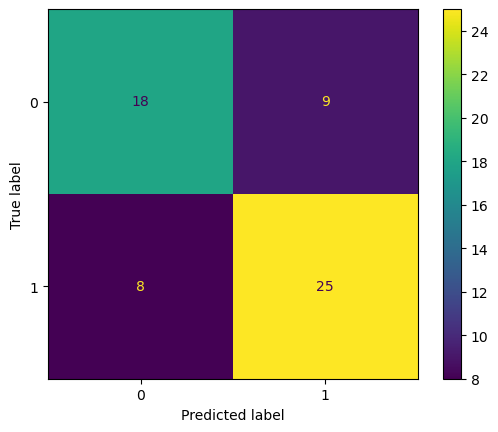

In [45]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.80      0.89      0.84        27

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

Time to test: 0.027796030044555664


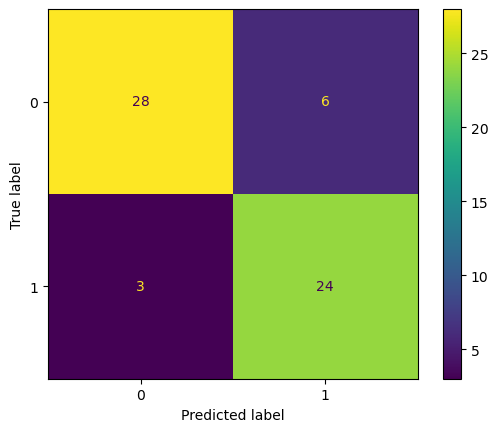

In [46]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [18]:
# Combined Models (RF & MLP)

In [47]:
from sklearn.ensemble import RandomForestClassifier as Ht_De_Ptn_RmFtCr
from sklearn.neural_network import MLPClassifier as Ht_De_Ptn_MLPCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

RF_params = {'max_depth': [10], 'max_features': ['auto'], 'min_samples_split': [10], 'n_estimators': [200]}
MLP_params = {'activation': ['tanh'], 'alpha': [0.001], 'learning_rate': ['adaptive'], 'max_iter': [300], 'solver': ['adam']}

Ht_De_Ptn_RmFtCrmd = Ht_De_Ptn_RmFtCr()
Ht_De_Ptn_MLPCrmd = Ht_De_Ptn_MLPCr()

# GridSearchCV for RF and MLP Classifier
Ht_De_Ptn_RFGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_RmFtCrmd, RF_params, cv=2, verbose=1)
Ht_De_Ptn_RFGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_MLPGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_MLPCrmd, MLP_params, cv=2, verbose=1)
Ht_De_Ptn_MLPGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('RF', Ht_De_Ptn_RFGrid.best_estimator_), ('MLP', Ht_De_Ptn_MLPGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined RF and MLP models:", Ht_De_Ptn_Vtmd.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'hard'}
The GSV score of combined RF and MLP models: 0.8200000000000001


In [48]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('RF', Ht_De_Ptn_RFGrid.best_estimator_), ('MLP', Ht_De_Ptn_MLPGrid.best_estimator_)], voting='hard')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.33940672874450684


              precision    recall  f1-score   support

           0       0.68      0.70      0.69        27
           1       0.75      0.73      0.74        33

    accuracy                           0.72        60
   macro avg       0.71      0.72      0.71        60
weighted avg       0.72      0.72      0.72        60

Time to validate: 0.03240084648132324


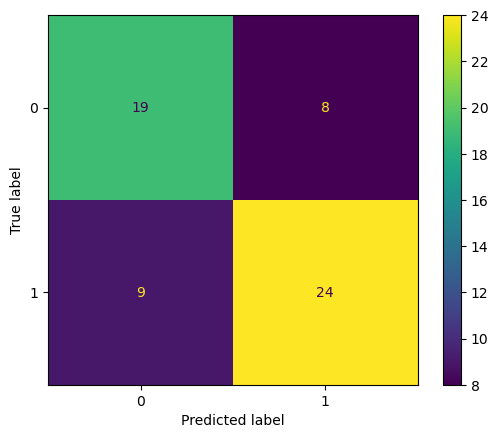

In [49]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        34
           1       0.79      0.85      0.82        27

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61

Time to test: 0.037164926528930664


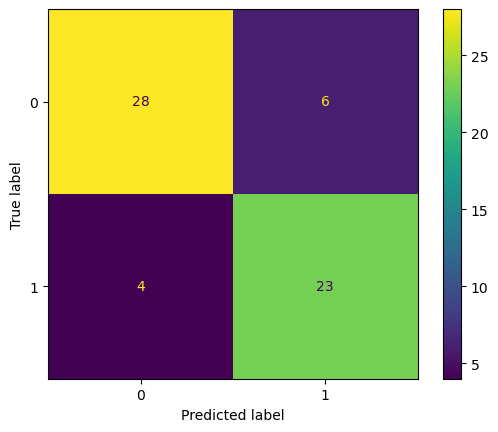

In [50]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [51]:
# Combined Models (MLP & DT)

In [56]:
from sklearn.tree import DecisionTreeClassifier as Ht_De_Ptn_DnTeCr
from sklearn.neural_network import MLPClassifier as Ht_De_Ptn_MLPCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

DT_params = {'criterion': ['gini'], 'max_depth': [10], 'min_samples_leaf': [1], 'min_samples_split': [7]}
MLP_params = {'activation': ['tanh'], 'alpha': [0.001], 'learning_rate': ['adaptive'], 'max_iter': [300], 'solver': ['adam']}

Ht_De_Ptn_DnTeCrmd = Ht_De_Ptn_DnTeCr()
Ht_De_Ptn_MLPCrmd = Ht_De_Ptn_MLPCr()

# GridSearchCV for RF and MLP Classifier
Ht_De_Ptn_MLPGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_MLPCrmd, MLP_params, cv=2, verbose=1)
Ht_De_Ptn_MLPGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_DTGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_DnTeCrmd, DT_params, cv=2, verbose=1)
Ht_De_Ptn_DTGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('MLP', Ht_De_Ptn_MLPGrid.best_estimator_), ('DT', Ht_De_Ptn_DTGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined MLP and DT models:", Ht_De_Ptn_Vtmd.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'hard'}
The GSV score of combined MLP and DT models: 0.86


In [58]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('MLP', Ht_De_Ptn_MLPGrid.best_estimator_), ('DT', Ht_De_Ptn_DTGrid.best_estimator_)], voting='hard')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.14792680740356445


              precision    recall  f1-score   support

           0       0.53      0.74      0.62        27
           1       0.68      0.45      0.55        33

    accuracy                           0.58        60
   macro avg       0.60      0.60      0.58        60
weighted avg       0.61      0.58      0.58        60

Time to validate: 0.009159326553344727


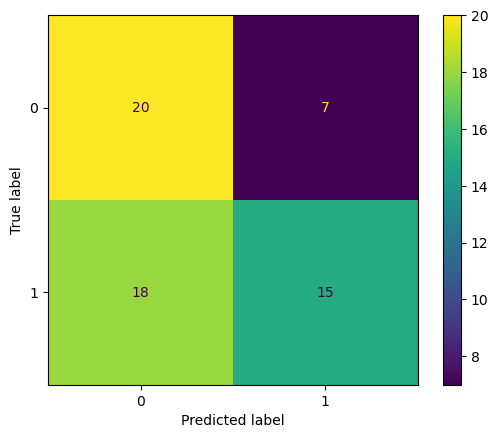

In [59]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.75      0.67      0.71        27

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Time to test: 0.009196996688842773


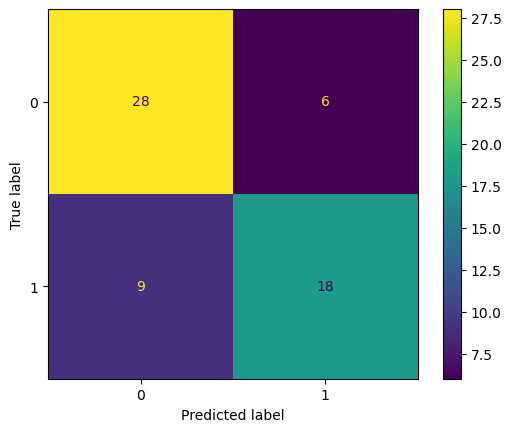

In [60]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

In [ ]:
# Combined Models (DT & SVM)

In [61]:
from sklearn.tree import DecisionTreeClassifier as Ht_De_Ptn_DnTeCr
from sklearn.svm import SVC as Ht_De_Ptn_SuVeCr

Ht_De_Ptn_VChp = {'voting': ['hard', 'soft']}

DT_params = {'criterion': ['gini'], 'max_depth': [10], 'min_samples_leaf': [1], 'min_samples_split': [7]}
SVM_params = {'C': [0.3], 'gamma': ['scale'], 'kernel': ['poly']}

Ht_De_Ptn_DnTeCrmd = Ht_De_Ptn_DnTeCr()
Ht_De_Ptn_SuVeCrmd = Ht_De_Ptn_SuVeCr()

# GridSearchCV for DT and SVM Classifier
Ht_De_Ptn_DTGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_DnTeCrmd, DT_params, cv=2, verbose=1)
Ht_De_Ptn_DTGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

Ht_De_Ptn_SVCGrid = Ht_De_Ptn_Gdscv(Ht_De_Ptn_SuVeCrmd, SVM_params, cv=2, verbose=1)
Ht_De_Ptn_SVCGrid.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

# Combined models using Voting Classifier
Ht_De_Ptn_Votmd = VotingClassifier(estimators=[('DT', Ht_De_Ptn_DTGrid.best_estimator_), ('SVM', Ht_De_Ptn_SVCGrid.best_estimator_)])

Ht_De_Ptn_Vtmd = Ht_De_Ptn_Gdscv(Ht_De_Ptn_Votmd, Ht_De_Ptn_VChp, cv=2, verbose=1)
Ht_De_Ptn_Vtmd.fit(Ht_De_Ptn_Xtr.sample(50, random_state=42), Ht_De_Ptn_Ytr.sample(50, random_state=42))

print(Ht_De_Ptn_Vtmd.best_params_)
print("The GSV score of combined DT and SVM models:", Ht_De_Ptn_Vtmd.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 2 candidates, totalling 4 fits
{'voting': 'hard'}
The GSV score of combined DT and SVM models: 0.88


In [62]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr = VotingClassifier(estimators=[('DT', Ht_De_Ptn_DTGrid.best_estimator_), ('SVM', Ht_De_Ptn_SVCGrid.best_estimator_)], voting='hard')
Ht_De_Ptn_VtmdClr.fit(Ht_De_Ptn_Xtr, Ht_De_Ptn_Ytr)

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
print("Time to train:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

Time to train: 0.006940603256225586


              precision    recall  f1-score   support

           0       0.59      0.74      0.66        27
           1       0.73      0.58      0.64        33

    accuracy                           0.65        60
   macro avg       0.66      0.66      0.65        60
weighted avg       0.67      0.65      0.65        60

Time to validate: 0.008384466171264648


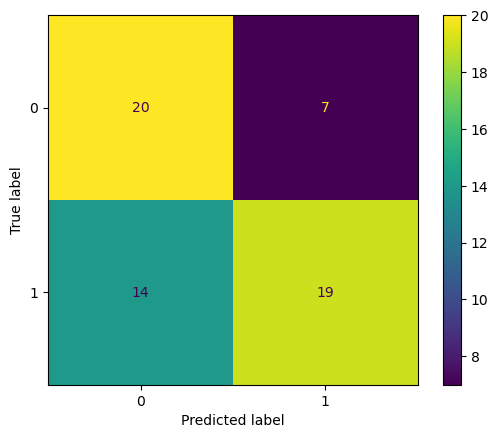

In [63]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr1 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xvl)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yvl, Ht_De_Ptn_VtmdClr1)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to validate:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        34
           1       0.75      0.67      0.71        27

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Time to test: 0.009432554244995117


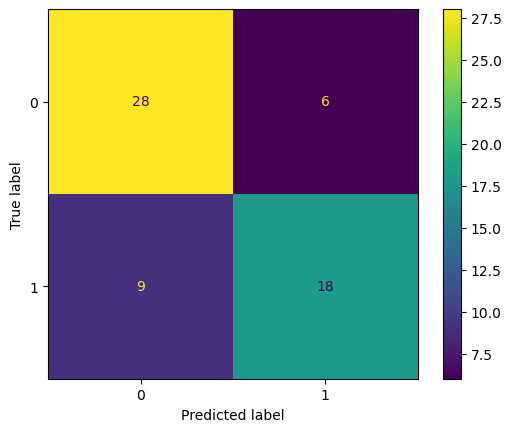

In [64]:
Ht_De_Ptn_tt = Ht_De_Ptn_tme.time()

Ht_De_Ptn_VtmdClr2 = Ht_De_Ptn_VtmdClr.predict(Ht_De_Ptn_Xts)
print(Ht_De_Ptn_Cfrt(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2))

Ht_De_Ptn_tt1 = Ht_De_Ptn_tme.time()
Ht_De_Ptn_XX = Ht_De_Ptn_Cfmx(Ht_De_Ptn_Yts, Ht_De_Ptn_VtmdClr2)
Ht_De_Ptn_YY = Ht_De_Ptn_Cfmxdy(confusion_matrix = Ht_De_Ptn_XX, display_labels = [0, 1])
Ht_De_Ptn_YY.plot()
print("Time to test:", Ht_De_Ptn_tt1-Ht_De_Ptn_tt)